# Simple Neural Network using Fashion MNIST dataset in Python, Keras 

This notebook is keeping up on Andreas Zinonos' Beginner Deep Learning Tutorial| MNIST Classification Neural Network in Python, Keras. Tutorial can be found from the following link: https://youtu.be/BfCPxoYCgo0

Last updated on 2021-11-05

In [23]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

In [2]:
#import data
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


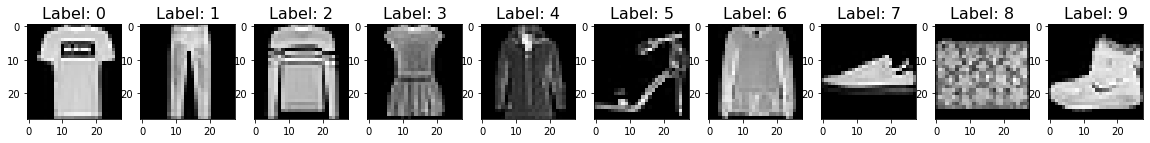

In [3]:
num_class = 10

f, ax = plt.subplots(1, num_class, figsize=(20, 20))

for i in range(0, num_class):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [4]:
#one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=num_class)
y_test = keras.utils.to_categorical(y_test, num_classes=num_class)

In [5]:
#normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
#reshape data

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [7]:
#create model

model = Sequential([
  Dense(units=256, input_shape=(784,), activation='relu'),
  Dense(units=128, activation='relu'),
  Dropout(0.2),
  Dense(units=10, activation='softmax')
])


#compile model

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
#train model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5087 - accuracy: 0.8160 - val_loss: 0.3899 - val_accuracy: 0.8557
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3794 - accuracy: 0.8608 - val_loss: 0.3563 - val_accuracy: 0.8722
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3420 - accuracy: 0.8744 - val_loss: 0.3584 - val_accuracy: 0.8683
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3159 - accuracy: 0.8825 - val_loss: 0.3258 - val_accuracy: 0.8797
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2999 - accuracy: 0.8892 - val_loss: 0.3338 - val_accuracy: 0.8760
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2846 - accuracy: 0.8949 - val_loss: 0.3416 - val_accuracy: 0.8768
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.8971 - val_loss: 0.3082 - val_accuracy:

In [9]:
#evaluate model
test_loss, test_acc = model.evaluate(x=X_test, y=y_test)
print('Test loss: {}, Test accuracy: {}'.format(test_loss,test_acc))

313/313 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8926
Test loss: 0.3913004994392395, Test accuracy: 0.8925999999046326


Got 89% accuracy on test dataset

Text(114.0, 0.5, 'True Label')

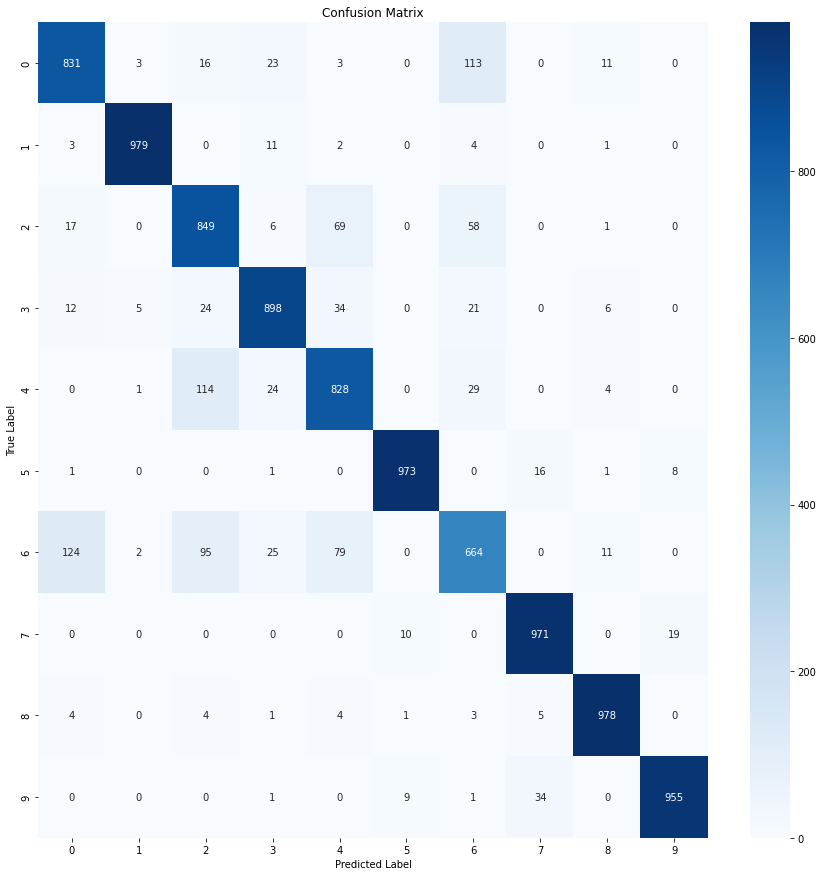

In [24]:
#confusion matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mtx = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(conf_mtx, fmt='d',annot=True, cmap="Blues")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')